# Descriptive stats for Aggregate Health Change

### Gavin Qu, March 28th

In [8]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_stata('/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/combined_panel_data.dta')

df

,index,lf_stat,changejbstat,private,hrgpay,hrnpay,logpay,earnings,education,agghealth,pidp,wave
0,0,1,NA,0.0,6.923610,5.192707,1.934937,1200.000000,2.0,2.0,22445,d
1,1,1,0,0.0,9.037906,7.500577,2.201428,1566.449951,2.0,2.0,22445,e
2,2,1,0,0.0,14.323737,11.193169,2.661918,2482.590088,2.0,2.0,22445,f
3,3,1,0,0.0,16.251269,10.385414,2.788171,2816.669922,2.0,2.0,22445,g
4,4,1,0,0.0,16.732056,11.539349,2.817326,2900.000000,2.0,2.0,22445,h
...,...,...,...,...,...,...,...,...,...,...,...,...
533471,533471,1,NA,1.0,25.904050,18.372375,3.254399,4489.689941,NaN,2.0,1653277290,f
533472,533472,1,0,1.0,24.040330,23.078698,3.179733,4166.669922,NaN,2.0,1653277290,g
533473,533473,1,0,1.0,28.866778,19.615682,3.362691,5003.189941,NaN,2.0,1653277290,h
533474,533474,1,NA,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1653277290,i


#### Construct new dataframe with hcond, hcondn, and jbhrs

In [11]:
import pyreadstat
# use latin-1 encoding if UTF8 does not work
wave1, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/a_indresp.dta")
wave2, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/b_indresp.dta")
wave3, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/c_indresp.dta", encoding="iso-8859-1")
wave4, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/d_indresp.dta")
wave5, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/e_indresp.dta", encoding="iso-8859-1")
wave6, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/f_indresp.dta")
wave7, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/g_indresp.dta")
wave8, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/h_indresp.dta")
wave9, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/i_indresp.dta")
wave10, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/j_indresp.dta")
wave11, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/k_indresp.dta")
wave12, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/l_indresp.dta")
wave13, meta = pyreadstat.read_dta("/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/m_indresp.dta")

df1 = pd.DataFrame(wave1)
df2 = pd.DataFrame(wave2)
df3 = pd.DataFrame(wave3)
df4 = pd.DataFrame(wave4)
df5 = pd.DataFrame(wave5)
df6 = pd.DataFrame(wave6)
df7 = pd.DataFrame(wave7)
df8 = pd.DataFrame(wave8)
df9 = pd.DataFrame(wave9)
df10 = pd.DataFrame(wave10)
df11 = pd.DataFrame(wave11)
df12 = pd.DataFrame(wave12)
df13 = pd.DataFrame(wave13)

**Filter the variable of interest**

In [36]:
#  function to include the 'wave' assignment
def select_and_rename(wave_df, wave_prefix, variables, wave_letter):
    # Select variables that exist in the current wave's DataFrame
    selected_vars = {f"{wave_prefix}_{var}": var for var in variables if f"{wave_prefix}_{var}" in wave_df.columns}

    # Include 'pidp'
    if 'pidp' in wave_df.columns:
        selected_vars['pidp'] = 'pidp'

    # Add the 'wave' column with the specified wave letter
    wave_df['wave'] = wave_letter
    selected_vars['wave'] = 'wave'

    # Select and rename the existing columns
    selected_columns = list(selected_vars.keys())
    return wave_df[selected_columns].rename(columns=selected_vars)

# List of all possible 'hcond' and 'hcondn' variables
all_possible_vars = ['jbhrs', 'jbot'] + [f'hcond{i}' for i in range(1, 23)] + [f'hcondn{i}' for i in range(1, 23)]

# Apply the function to each wave DataFrame
df1_selected = select_and_rename(df1, 'a', all_possible_vars, 'a')
df2_selected = select_and_rename(df2, 'b', all_possible_vars, 'b')
df3_selected = select_and_rename(df3, 'c', all_possible_vars, 'c')
df4_selected = select_and_rename(df4, 'd', all_possible_vars, 'd')
df5_selected = select_and_rename(df5, 'e', all_possible_vars, 'e')
df6_selected = select_and_rename(df6, 'f', all_possible_vars, 'f')
df7_selected = select_and_rename(df7, 'g', all_possible_vars, 'g')
df8_selected = select_and_rename(df8, 'h', all_possible_vars, 'h')
df9_selected = select_and_rename(df9, 'i', all_possible_vars, 'i')
df10_selected = select_and_rename(df10, 'j', all_possible_vars, 'j')
df11_selected = select_and_rename(df11, 'k', all_possible_vars, 'k')
df12_selected = select_and_rename(df12, 'l', all_possible_vars, 'l')
df13_selected = select_and_rename(df13, 'm', all_possible_vars, 'm')

# Now concatenate all the selected wave DataFrames into a single DataFrame
all_waves_df = pd.concat(
    [df1_selected, df2_selected, df3_selected, df4_selected, df5_selected, 
     df6_selected, df7_selected, df8_selected, df9_selected, df10_selected, 
     df11_selected, df12_selected, df13_selected], 
    ignore_index=True, 
    sort=False
)
# Proceed with merging all_waves_df with your main DataFrame
df_combined_hcond = df.merge(all_waves_df, on=['pidp', 'wave'], how='left')
# Drop the 'index' column
df_combined_hcond = df_combined_hcond.drop('index', axis=1)

In [42]:
print(list(df_combined_hcond))

['lf_stat', 'changejbstat', 'private', 'hrgpay', 'hrnpay', 'logpay', 'earnings', 'education', 'agghealth', 'pidp', 'wave', 'jbhrs', 'jbot', 'hcond1', 'hcond2', 'hcond3', 'hcond4', 'hcond5', 'hcond6', 'hcond7', 'hcond8', 'hcond9', 'hcond10', 'hcond11', 'hcond12', 'hcond13', 'hcond14', 'hcond15', 'hcond16', 'hcond17', 'hcondn1', 'hcondn2', 'hcondn3', 'hcondn4', 'hcondn5', 'hcondn6', 'hcondn7', 'hcondn8', 'hcondn9', 'hcondn10', 'hcondn11', 'hcondn12', 'hcondn13', 'hcondn14', 'hcondn15', 'hcondn16', 'hcondn17', 'hcond18', 'hcondn18', 'hcond19', 'hcondn19', 'hcondn20', 'hcond21', 'hcond22']


In [45]:
# Filter and display to show only columns with NaNs
nan_columns = nan_counts[nan_counts > 0]

print(nan_columns)

private      290456
hrgpay       287234
hrnpay       287234
logpay       287234
earnings     291463
education      7867
agghealth      1103
hcond1        54569
hcond2        54569
hcond3        54569
hcond4        54569
hcond5        54569
hcond6        54569
hcond7        54569
hcond8        54569
hcond9       178165
hcond10       54569
hcond11       54569
hcond12       54569
hcond13       54569
hcond14       54569
hcond15       54569
hcond16       54569
hcond17      178165
hcondn1      174590
hcondn2      174590
hcondn3      174590
hcondn4      174590
hcondn5      174590
hcondn6      174590
hcondn7      174590
hcondn8      174590
hcondn9      174590
hcondn10     174590
hcondn11     174590
hcondn12     174590
hcondn13     174590
hcondn14     174590
hcondn15     174590
hcondn16     174590
hcondn17     174590
hcond18      247166
hcondn18     370762
hcond19      292358
hcondn19     415954
hcondn20     415954
hcond21      409880
hcond22      437878
dtype: int64


#### Descriptive Stats
1.	Pay density plot split by health status
2.	Hours worked density plot split by health status
3.	Labour force status histogram split by health status

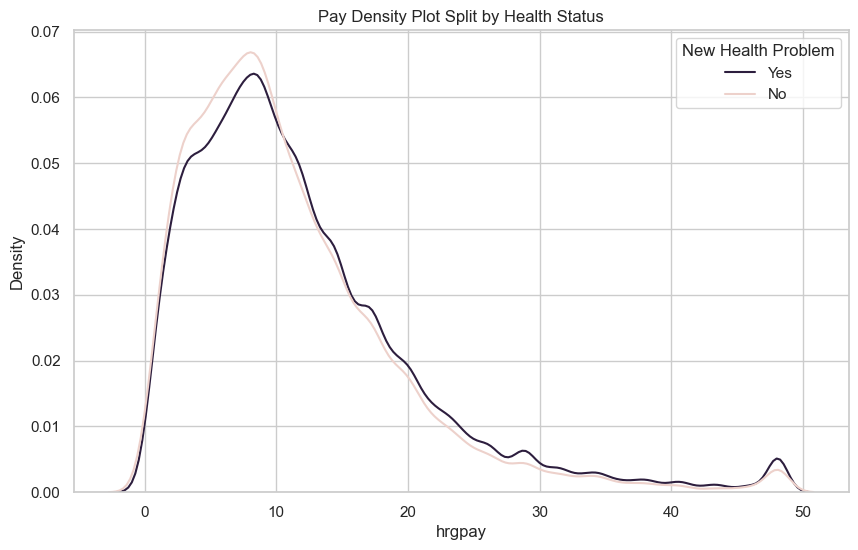

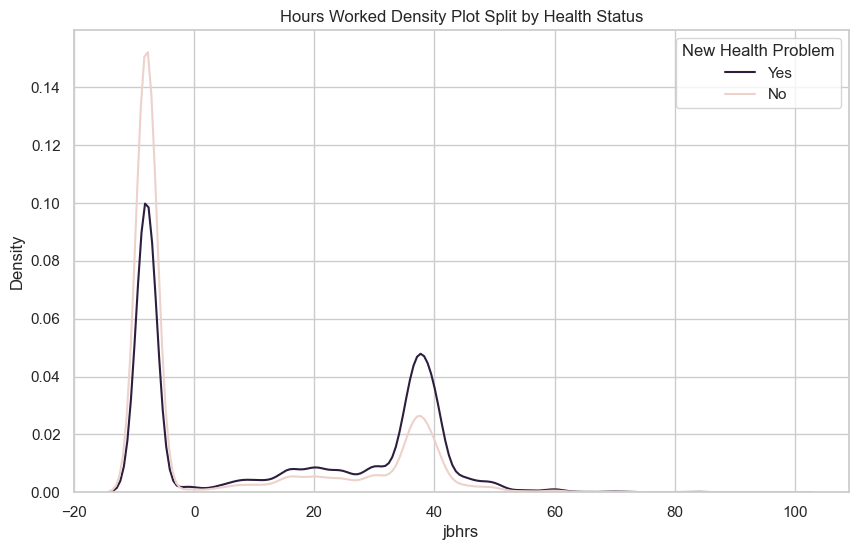

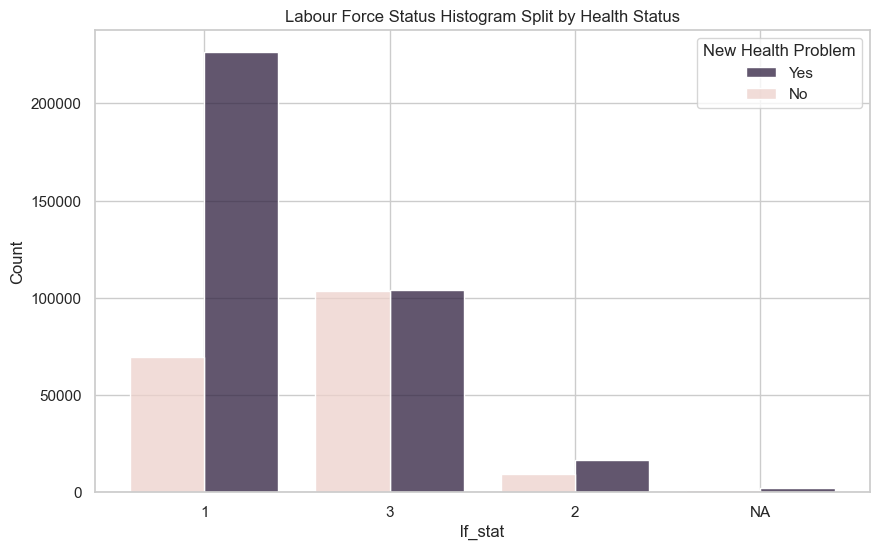

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a map for the agghealth values to their meanings
health_status_labels = {1: 'Yes (New Health Problem)', 2: 'No (No New Health Problem)'}

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Pay Density Plot Split by Health Status
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_combined_hcond, x='hrgpay', hue='agghealth', common_norm=False)
plt.title('Pay Density Plot Split by Health Status')
plt.legend(title='New Health Problem', labels=['Yes', 'No'])
plt.show()

# Hours Worked Density Plot Split by Health Status
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_combined_hcond, x='jbhrs', hue='agghealth', common_norm=False)
plt.title('Hours Worked Density Plot Split by Health Status')
plt.legend(title='New Health Problem', labels=['Yes', 'No'])
plt.show()

# Labour Force Status Histogram Split by Health Status
plt.figure(figsize=(10, 6))
sns.histplot(data=df_combined_hcond, x='lf_stat', hue='agghealth', multiple="dodge", shrink=.8)
plt.title('Labour Force Status Histogram Split by Health Status')
plt.legend(title='New Health Problem', labels=['Yes', 'No'])
plt.show()